In [1]:
# 导入数据库
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [2]:
filename = "D:/1python_workspace/some work/data.csv"
data = pd.read_csv(filename, encoding='gbk')
data.shape

(4754, 90)

In [3]:
print(data.columns)
data.head(5)

Index(['num', 'custid', 'trade_no', 'bank_card_no', 'low_volume_percent',
       'middle_volume_percent', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'tr

,num,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018050e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018050e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018050e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018050e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018050e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [4]:

#查看数据类型：object, int64, float64，看有无缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
num                                           4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null float64
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobilit

In [5]:
#计算缺失率和唯一率：删除一些不必要的列
data_1=pd.DataFrame(data.isnull().sum(),columns=['loss_num'])
data_2=pd.DataFrame(data.nunique(),columns=['unique_num'])
data_loss_unique=pd.merge(data_1,data_2,right_index=True,left_index=True)
data_loss_unique['loss_rate']=data_loss_unique['loss_num']/data.shape[0]
data_loss_unique['unique_rate']=data_loss_unique['unique_num']/data.shape[0]

data_loss_unique.head().T

,num,custid,trade_no,bank_card_no,low_volume_percent
loss_num,0.0,0.0,0.00000,0.00000,2.000000
unique_num,4754.0,4754.0,1.00000,1.00000,40.000000
loss_rate,0.0,0.0,0.00000,0.00000,0.000421
unique_rate,1.0,1.0,0.00021,0.00021,0.008414


In [6]:
#查看缺失的列
data_loss_unique.sort_values(by='loss_rate',ascending=False)
#student_feature缺失率过高，删掉


,loss_num,unique_num,loss_rate,unique_rate
student_feature,2998,2,0.630627,0.000421
cross_consume_count_last_1_month,426,19,0.089609,0.003997
latest_six_month_apply,304,65,0.063946,0.013673
latest_one_month_apply,304,36,0.063946,0.007573
latest_query_time,304,207,0.063946,0.043542
query_sum_count,304,74,0.063946,0.015566
query_cash_count,304,17,0.063946,0.003576
query_finance_count,304,25,0.063946,0.005259
query_org_count,304,46,0.063946,0.009676
apply_credibility,304,41,0.063946,0.008624


In [7]:
#查看唯一值
data_loss_unique.sort_values(by='unique_rate',ascending=False)

#删掉rade_no、custid、id_name、source、bank_card_no唯一率较高或者较低，且对于分类无实际意义，可直接删除


,loss_num,unique_num,loss_rate,unique_rate
num,0,4754,0.000000,1.000000
custid,0,4754,0.000000,1.000000
historical_trans_amount,0,4524,0.000000,0.951620
id_name,276,4309,0.058056,0.906395
trans_amount_3_month,0,3524,0.000000,0.741271
pawns_auctions_trusts_consume_last_6_month,0,2730,0.000000,0.574253
repayment_capability,0,2390,0.000000,0.502735
consume_mini_time_last_1_month,26,1971,0.005469,0.414598
abs,0,1697,0.000000,0.356963
first_transaction_time,2,1693,0.000421,0.356121


In [8]:
#删除上述7个变量  还剩下83个
columns_drop=['num','student_feature','bank_card_no','source','trade_no','id_name','custid']
data.drop(columns=columns_drop,axis=1,inplace=True)

In [9]:
data.shape


(4754, 83)

In [10]:
# 数值型数据均值填充
dict1 = data.isnull().sum()
for key in dict1.keys():
    if data[key].dtype != object:
        data[key].fillna(data[key].mean(),inplace = True)
    else:
        print('object类型的缺失值和个数',key,dict1[key])
data.isnull().sum()

object类型的缺失值和个数 reg_preference_for_trad 2
object类型的缺失值和个数 latest_query_time 304
object类型的缺失值和个数 loans_latest_time 297


low_volume_percent                          0
middle_volume_percent                       0
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           0
trans_activity_month                        0
trans_activity_day                          0
transd_mcc                                  0
trans_days_interval_filter                  0
trans_days_interval                         0
regional_mobility                           0
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   0
first_transaction_time                      0
historical_trans_amount                     0
historical_trans_day                        0
rank_trad_1_month                           0
trans_amount_3_month                        0
avg_consume_less_12_valid_month             0
abs                                         0
top_trans_count_last_1_month                0
avg_price_last_12_month           

In [11]:
data['reg_preference_for_trad'].unique()

array(['一线城市', '三线城市', '境外', '二线城市', '其他城市', nan], dtype=object)

In [12]:
data['reg_preference_for_trad'].fillna("其他城市",inplace = True)
data['reg_preference_for_trad'].isnull().sum()

0

In [13]:
# #处理reg_preference_for_trad，并将其转化为数值类型
# for i,j in enumerate(data['reg_preference_for_trad']):
#     if j=='一线城市':
#         data['reg_preference_for_trad'][i]=1
#     elif j=='二线城市':
#         data['reg_preference_for_trad'][i]=2
#     elif j=='三线城市':
#         data['reg_preference_for_trad'][i]=3
#     elif j=='其他城市':
#         data['reg_preference_for_trad'][i]=4
#     elif j=='境外':
#         data['reg_preference_for_trad'][i]=5
#     else:
#         data['reg_preference_for_trad'][i]=0

dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())):
    dic[val] = i
    
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)


In [14]:
data['reg_preference_for_trad'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
# 时间类型众数填充
data['latest_query_time'].fillna(data['latest_query_time'].mode()[0],inplace = True)
data['loans_latest_time'].fillna(data['loans_latest_time'].mode()[0],inplace = True)
print(data['latest_query_time'].isnull().sum())


0


In [16]:

#将时间序列object 修改为 时间序列
data['latest_query_time'] = (pd.to_datetime(data['latest_query_time']) - pd.to_datetime('today')).apply(lambda col: col.days)
data['loans_latest_time'] = (pd.to_datetime(data['loans_latest_time']) - pd.to_datetime('today')).apply(lambda col: col.days)

In [17]:
data.isnull().sum()

low_volume_percent                        0
middle_volume_percent                     0
take_amount_in_later_12_month_highest     0
trans_amount_increase_rate_lately         0
trans_activity_month                      0
trans_activity_day                        0
transd_mcc                                0
trans_days_interval_filter                0
trans_days_interval                       0
regional_mobility                         0
repayment_capability                      0
is_high_user                              0
number_of_trans_from_2011                 0
first_transaction_time                    0
historical_trans_amount                   0
historical_trans_day                      0
rank_trad_1_month                         0
trans_amount_3_month                      0
avg_consume_less_12_valid_month           0
abs                                       0
top_trans_count_last_1_month              0
avg_price_last_12_month                   0
avg_price_top_last_12_valid_mont

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 83 columns):
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans_from_2011                     4754 non-null float64
first_transacti

In [19]:

#数值归一化处理
from sklearn import preprocessing
in_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if data[i].dtype == object:
        print(i)
    else:
        data[i] = (data[i]- data[i].min())/(data[i].max()-data[i].min())
data.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.000000,0.000019,0.488636,0.308370,0.375,0.094737,0.095652,0.50,...,0.29,0.244638,0.013777,0.862069,0.055556,0.10,0.004505,0.014493,0.038674,0.061538
1,0.02,0.94,0.029412,0.000027,1.000000,0.468062,0.425,0.105263,0.043478,0.75,...,0.35,0.254783,0.173364,0.919540,0.277778,0.30,0.085586,0.113043,0.016575,0.012308
2,0.04,0.96,0.000000,0.000021,1.000000,0.089207,0.275,0.238596,0.078261,0.00,...,0.16,0.181159,0.048220,1.000000,0.055556,0.05,0.015766,0.050725,0.011050,0.024615
3,0.00,0.96,0.029412,0.000003,0.511364,0.819383,0.500,0.049123,0.008696,0.50,...,0.32,0.223333,0.187141,0.919540,0.277778,0.25,0.112613,0.147101,0.011050,0.018462
4,0.01,0.99,0.000000,0.000010,1.000000,0.156388,0.275,0.231579,0.165217,0.00,...,0.23,0.236232,0.095293,0.908046,0.111111,0.10,0.031532,0.099638,0.066298,0.375385


In [20]:
# # 计算相关性
# cor = data.corr()
# corr = np.abs(cor["status"]).sort_values(ascending=False)
# corr

In [21]:
# #选择相关程度在0.04以上的特征组合起来作为新的特征
# lst= list(corr[corr>0.05].index)
# len(lst)


In [22]:
# # 特征工程
# new_feature_data = data[lst]
# new_feature_data.head()
# new_feature_data.info()

# IV选择特征

In [23]:

#分X,Y值和训练集测试集
from sklearn.model_selection import train_test_split
y = data['status']
X = data.drop(['status'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2018)
print(X_train.shape)
print(X_test.shape)


(3327, 82)
(1427, 82)


In [24]:
import math
from scipy import stats
from sklearn.utils.multiclass import type_of_target

def woe(X, y, event=1):  
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        # woe_dict, iv = woe_single_x(x, y, feature, event)
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict) 
        
    return iv_dict
        
def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = i + 1    # 将[i, i+1]块内的值标记成i+1
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total
    
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv


In [25]:
iv_dict = woe(X_train, y_train)
iv = sorted(iv_dict.items(), key = lambda x:x[1],reverse = True)
iv

[('history_fail_fee', 0.23601952893571299),
 ('latest_query_time', 0.23547135512318113),
 ('latest_six_month_apply', 0.23490510480064064),
 ('latest_query_day', 0.23165030755336188),
 ('history_suc_fee', 0.23132587006862826),
 ('trans_days_interval', 0.23127346695672282),
 ('trans_activity_day', 0.23089021521474926),
 ('avg_price_last_12_month', 0.23076797912604352),
 ('apply_score', 0.23068994910029134),
 ('trans_amount_3_month', 0.23010632257866417),
 ('loans_avg_limit', 0.22937233933022275),
 ('loans_credibility_limit', 0.22923404864220617),
 ('low_volume_percent', 0.22831922306127952),
 ('consfin_credibility', 0.22804472290267083),
 ('avg_price_top_last_12_valid_month', 0.22804418697211443),
 ('latest_three_month_loan', 0.22786568449353656),
 ('historical_trans_day', 0.22785892580201067),
 ('latest_one_month_loan', 0.2259858987958161),
 ('trans_day_last_12_month', 0.2258295769673027),
 ('loans_cash_count', 0.22582167536745912),
 ('loans_org_count_current', 0.22582167536745912),
 ('

In [26]:
threshold = 0.1
data_index = []
for i in range(len(iv)):
    if iv[i][1] < threshold:
        data_index.append(iv[i])
        print(iv[i])
#X_train.drop(data_index, axis=1, inplace=True)

In [27]:
# logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pre = LR.predict(X_test)
LR.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7785564120532585

In [28]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87      1294
         1.0       0.25      0.66      0.36       133

   micro avg       0.78      0.78      0.78      1427
   macro avg       0.60      0.73      0.61      1427
weighted avg       0.89      0.78      0.82      1427



In [29]:
# SVC
from sklearn.svm import SVC
SVC = SVC(probability=True)
SVC.fit(X_train, y_train)
y_pre= SVC.predict(X_test)
SVC.score(X_test, y_test)


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7484232655921513

In [30]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      1427
         1.0       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75      1427
   macro avg       0.50      0.37      0.43      1427
weighted avg       1.00      0.75      0.86      1427



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [31]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=500, min_samples_split=2, bootstrap=True, max_depth=4, max_features=6)
RF.fit(X_train, y_train)
y_pre = RF.predict(X_test)
RF.score(X_test, y_test)

0.7722494744218641

In [32]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87      1377
         1.0       0.12      0.84      0.21        50

   micro avg       0.77      0.77      0.77      1427
   macro avg       0.55      0.80      0.54      1427
weighted avg       0.96      0.77      0.84      1427



In [33]:
#决策树
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(max_depth=4)
DTC.fit(X_train, y_train)
y_pre = DTC.predict(X_test)
DTC.score(X_test, y_test)

0.7589348283111422

In [34]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1186
         1.0       0.36      0.53      0.43       241

   micro avg       0.76      0.76      0.76      1427
   macro avg       0.63      0.67      0.64      1427
weighted avg       0.80      0.76      0.78      1427



In [35]:
# XGBoost模型
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pre = xgb.predict(X_test)
xgb.score(X_test, y_test)


0.7876664330763841

In [36]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      1215
         1.0       0.37      0.63      0.47       212

   micro avg       0.79      0.79      0.79      1427
   macro avg       0.65      0.72      0.67      1427
weighted avg       0.84      0.79      0.81      1427



In [37]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

models={'LR':LR,'svc':SVC,'decision tree':DTC,'xgboost':xgb,'random forest':RF}

df_result=pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score','roc_auc_score'])

#定义评价函数,根据y_pred和y_test返回acc,p,r和f1值
def evaluate(y_pred,y_test):
    acc=accuracy_score(y_test,y_pred)
    p=precision_score(y_test,y_pred)
    r=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    return acc,p,r,f1
    
#进一步每个模型model进行迭代,并将df_result进行填充,并计算auc值
row=0  
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_proba=model.predict_proba(X_test)[:,1]
    acc,p,r,f1=evaluate(y_pred,y_test)
    auc=roc_auc_score(y_test,y_pred_proba)
    df_result.loc[row]=[name,acc,p,r,f1,auc]
    row+=1
    
df_result

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,model,accuracy,precision,recall,f1_score,roc_auc_score
0,LR,0.778556,0.661654,0.245125,0.357724,0.768732
1,svc,0.748423,0.000000,0.000000,0.000000,0.772587
2,decision tree,0.758935,0.531120,0.356546,0.426667,0.693248
3,xgboost,0.787666,0.632075,0.373259,0.469352,0.773659
4,random forest,0.775053,0.880000,0.122563,0.215159,0.762858


auc 60.14952583643704
auc 50.0
auc 62.53703587785463
auc 65.01126725298114
auc 55.84723482833087


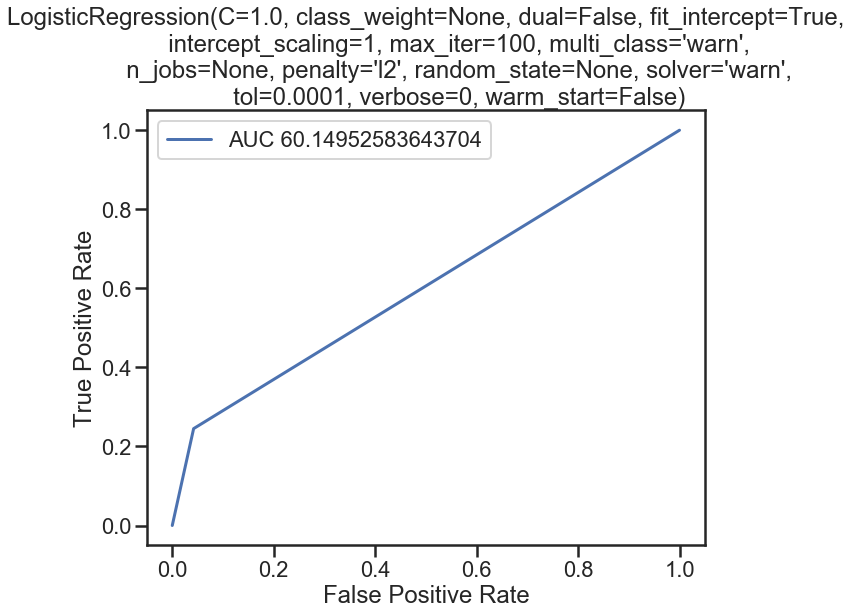

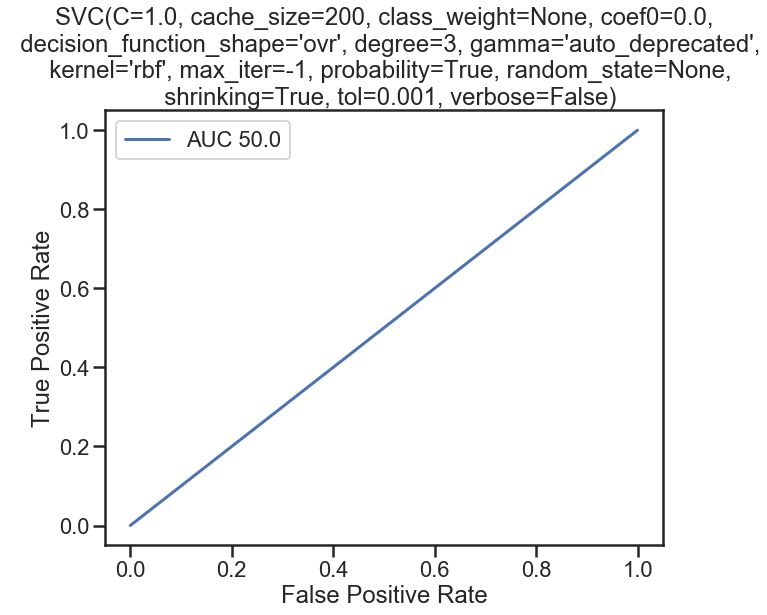

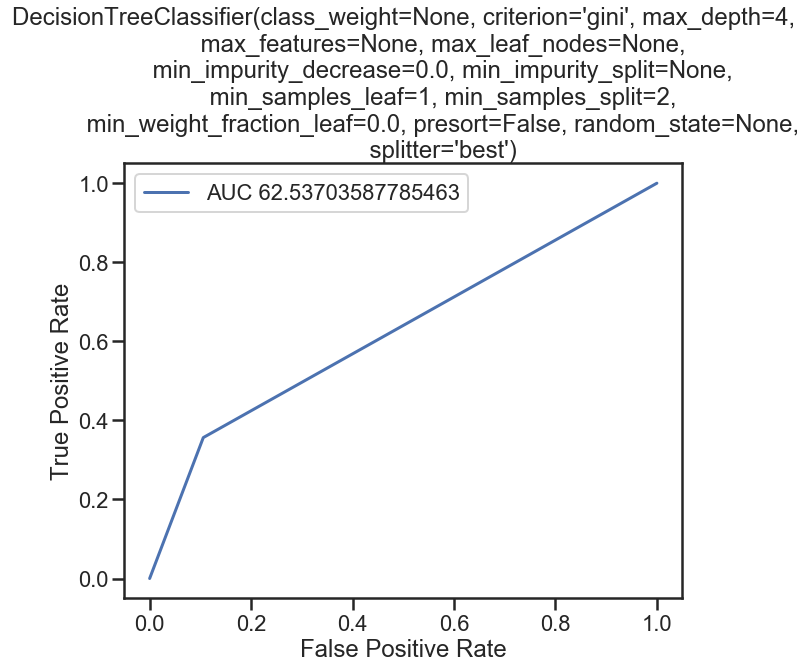

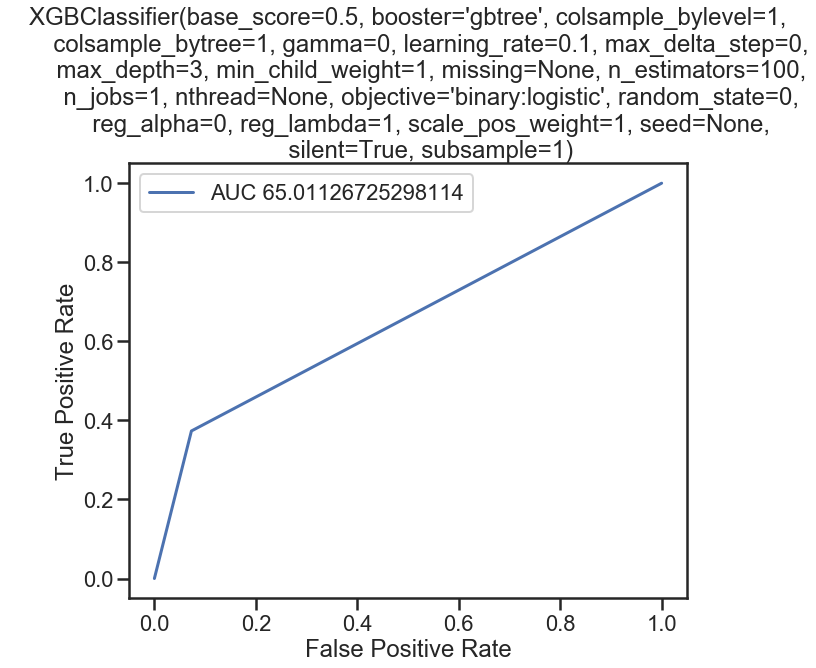

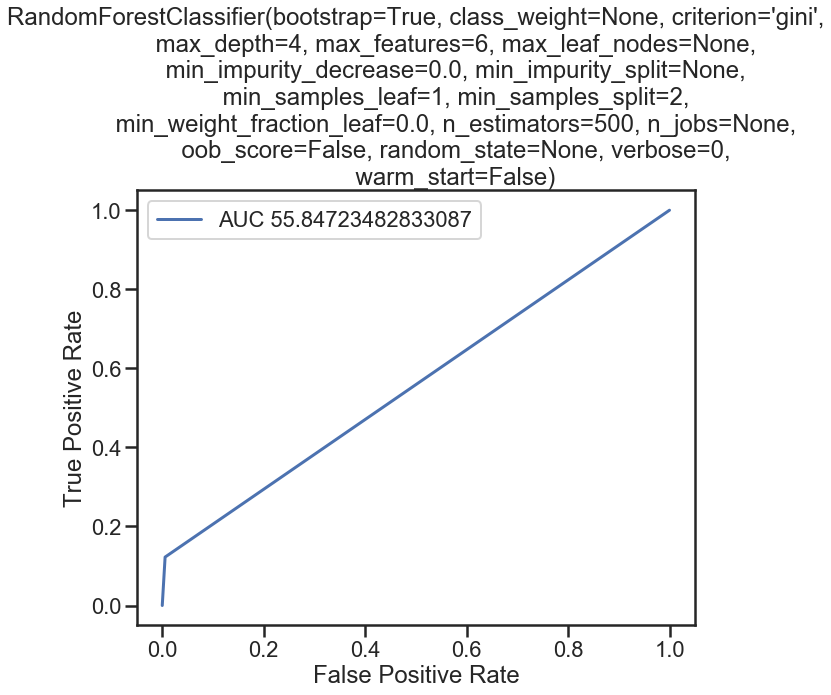

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
for name,model in models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{}'.format(model))
    auc_t = auc(fpr, tpr) * 100
    print('auc',auc_t)
    plt.legend(["AUC {}".format(auc_t)])
plt.show()



In [39]:
#网格搜索法
from sklearn.model_selection import GridSearchCV
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,6)]
                ,'min_samples_leaf':[*range(1,50,10)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,5)]
                }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=5)
GS.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 11, 21, 31, 41], 'min_impurity_decrease': [0.0, 0.125, 0.25, 0.375, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 21,
 'splitter': 'random'}

In [41]:
GS.best_score_

0.7793808235647731

# 模型融合

In [44]:
from mlxtend.classifier import StackingClassifier



lr_1 = LogisticRegression(C=0.1,penalty='l1')
dtc_2 = DecisionTreeClassifier(criterion='gini',max_depth=4)
rf_3 = RandomForestClassifier(criterion='entropy',max_depth=4)
xgb_4 = XGBClassifier(max_depth=3,min_child_weight=3)
sclf = StackingClassifier(classifiers=[dtc_2,rf_3,xgb_4],meta_classifier=lr_1)

In [45]:
sclf.fit(X_train,y_train)
y_pre_stacking = sclf.predict(X_test)
sclf.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7841625788367204

In [46]:
print(classification_report(y_pre_stacking, y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      1230
         1.0       0.35      0.63      0.45       197

   micro avg       0.78      0.78      0.78      1427
   macro avg       0.64      0.72      0.66      1427
weighted avg       0.85      0.78      0.81      1427

